### 최적화 중

- 최적화란 - 임의의 모델에 대한 결과(Output)가 원하는 조건을 만족하도록 최적의 변수 조합(Input)을 찾는 문제
    - 점수나 이윤의 최대화
    - 에러나 손실의 최소화

#### 최적화 문제의 해
- 일반적으로 최대화의 문제를 -f(x)로 변경해 최소화 문제로 품

##### 최소화 하려는 함수
- 목적함수(Objective function), 비용함수(Cost function), 손실함수(Loss function) 이라 명명

#### 경사하강법

$$ x_{k+1} = x_k - \lambda	 \nabla f(x_k) $$

- $ \lambda $ 스텝사이즈
    - 위치를 옮기는 거리 결정 비례상수
    - 하이퍼 파라미터로 개발자(사람)이 직접 지정해줘야 함
    - 딥러닝에서는 Learning Rate(학습률)로 표현함

In [1]:
!pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### 한글문제 해결

In [ ]:
from matplotlib import rcParams, font_manager, rc
import warnings

# 맑은고딕으로 변경
font_path = 'C:/Windows/Fonts/malgun.ttf' 
font = font_manager.FontProperties(fname=font_path, size=10).get_name()

# warning 표시끄기
warnings.simplefilter('ignore') # 경고메시지 무시

# 기본폰트 설정
plt.rcParams['font.family'] = font
# 기본폰트 사이즈 설정
plt.rcParams['font.size'] = 12
# 기본차트 사이즈 변경
plt.rcParams['figure.figsize'] = (12, 5)
# 기본그리드 표시
plt.rcParams['axes.grid'] = True
# 한글화 후 마이너스표시 네모를 정상출력
plt.rcParams['axes.unicode_minus'] = False

In [31]:
# Seaboarn 사용시는 나눔고딕이 안됨. 맑은 고딕
sns.set(font=font, rc={'axes.unicode_minus':False}, style='darkgrid')

## set() is deprecated refered by https://seaborn.pydata.org/generated/seaborn.set_theme.html

In [32]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='malgun gothic', font_scale=1, color_codes=True, rc=None)

In [ ]:
%matplotlib inline

##### 경사하강법에서
- 1차원 목적함수 - $ f_1(x) = 3^{x^2} + 6^x + 1 $
- 목적함수의 도함수 - $\frac{df_1(x)}{d_x} = 6x + 6 $ 

In [34]:
def f1(x):
    return 3*x**2 + 6*x + 1

def f1d(x):
    '''f1(x)의 도함수 정의'''
    return 6*x + 6

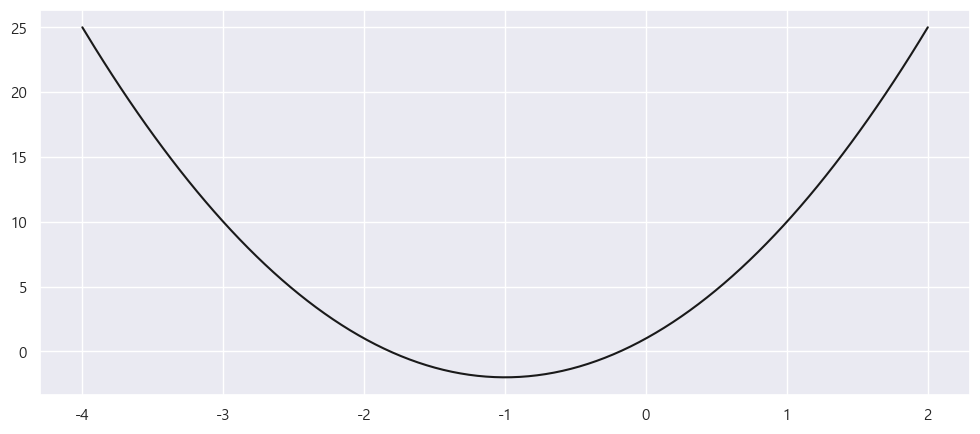

In [9]:
xx = np.linspace(-4, 2, 200)
plt.plot(xx, f1(xx), 'k-')
plt.show()

In [10]:
step_size = 0.1

start:x_0 = -3.00, g_0 = -12.00


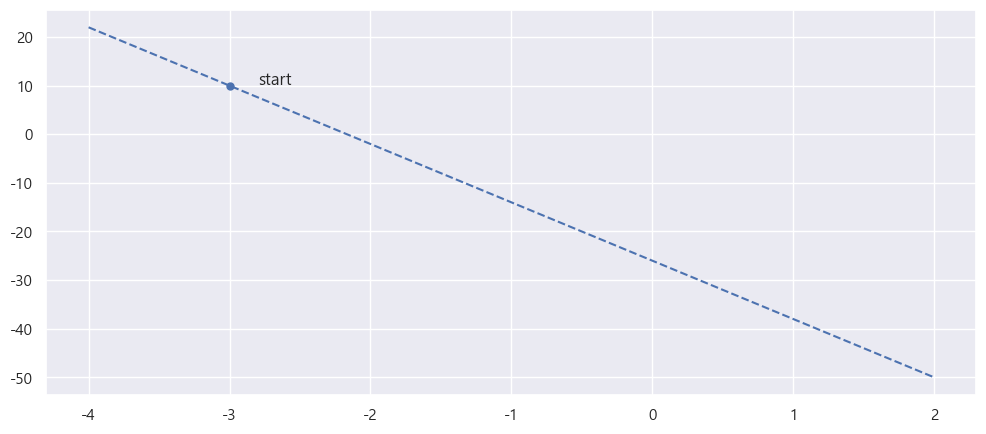

In [11]:
## start
x = -3
plt.plot(x, f1(x), 'bo', markersize=5)
plt.text(x + 0.2, f1(x) + 0.1, 'start')
plt.plot(xx, f1d(x)*(xx - x)+f1(x), 'b--')
print(f'start:x_0 = {x:.2f}, g_0 = {f1d(x):.2f}')

#### 통합

start:x_0 = -3.00, g_0 = -12.00


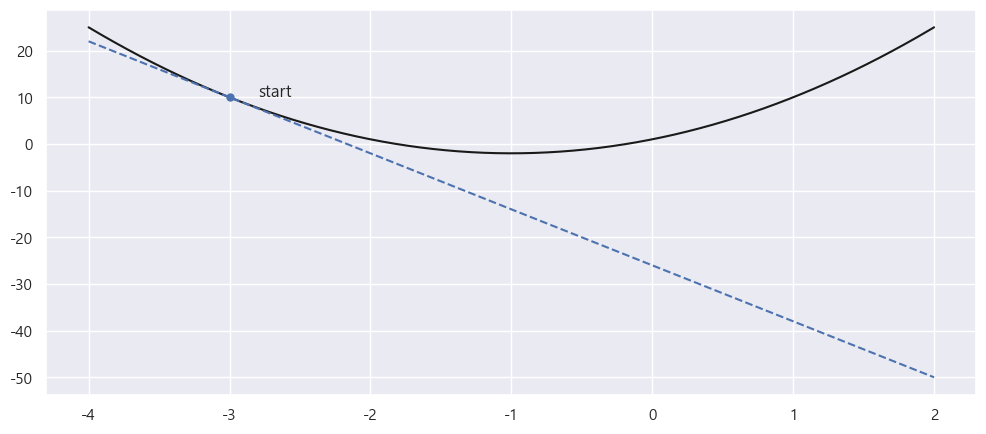

In [12]:
xx = np.linspace(-4, 2, 200)
plt.plot(xx, f1(xx), 'k-')

step_size = 0.1

## start
x = -3
plt.plot(x, f1(x), 'bo', markersize=5)
plt.text(x + 0.2, f1(x) + 0.1, 'start')
plt.plot(xx, f1d(x)*(xx - x)+f1(x), 'b--')
print(f'start:x_0 = {x:.2f}, g_0 = {f1d(x):.2f}')
plt.show()

start:x_0 = -3.00, g_0 = -12.00
1st step:x_1 = -1.80, g_1 = -4.80
2nd step:x_2 = -1.32, g_2 = -1.92


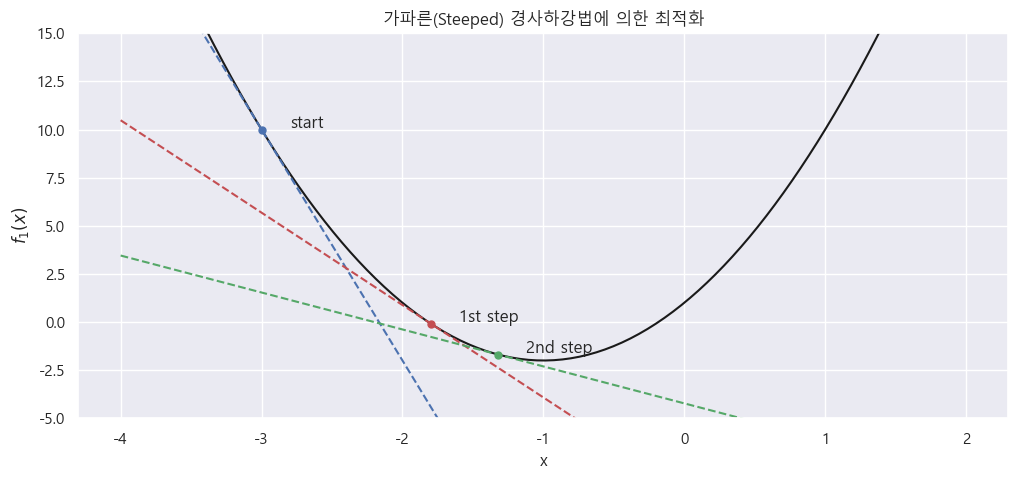

In [36]:
xx = np.linspace(-4, 2, 200)
plt.plot(xx, f1(xx), 'k-')

step_size = 0.1

## start
x = -3
plt.plot(x, f1(x), 'bo', markersize=5)
plt.text(x + 0.2, f1(x) + 0.1, 'start')
plt.plot(xx, f1d(x)*(xx - x)+f1(x), 'b--')
print(f'start:x_0 = {x:.2f}, g_0 = {f1d(x):.2f}')


# k = 1
x = x - step_size * f1d(x)
plt.plot(x, f1(x), 'ro', markersize=5)
plt.text(x + 0.2, f1(x) + 0.1, '1st step')
plt.plot(xx, f1d(x)*(xx-x)+f1(x), 'r--')
print(f'1st step:x_1 = {x:.2f}, g_1 = {f1d(x):.2f}')

# k = 2
x = x - step_size * f1d(x)
plt.plot(x, f1(x), 'go', markersize=5)
plt.text(x + 0.2, f1(x) + 0.1, '2nd step')
plt.plot(xx, f1d(x)*(xx-x)+f1(x), 'g--')
print(f'2nd step:x_2 = {x:.2f}, g_2 = {f1d(x):.2f}')

plt.ylim(-5, 15)
plt.xlabel('x')
plt.ylabel('$f_1(x)$') # 수식 표현
plt.title('가파른(Steeped) 경사하강법에 의한 최적화')
plt.grid(True)

plt.show()

#### 스텝 사이즈를 크게 했을 때 문제

start:x_0 = -3.00, g_0 = -12.00
1st step:x_1 = 1.08, g_1 = 12.48
2nd step:x_2 = -3.16, g_2 = -12.98


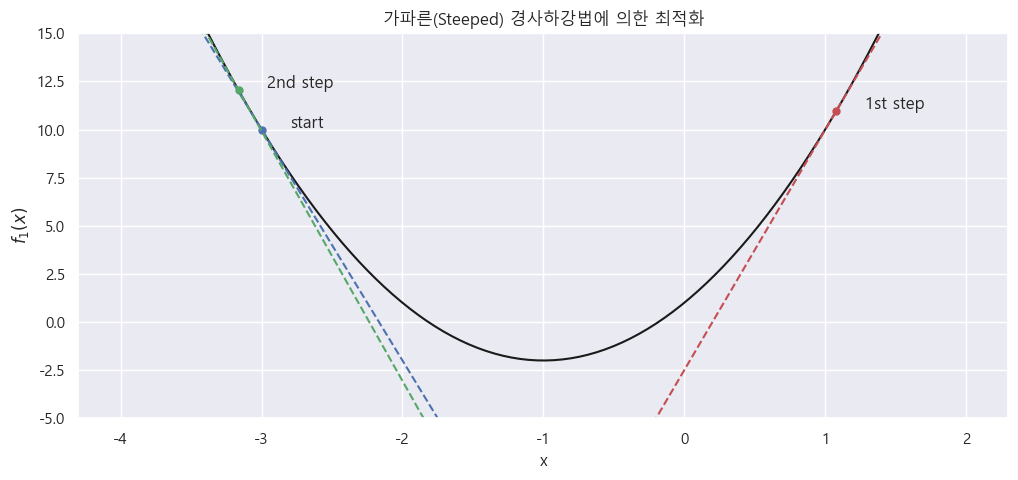

In [37]:
xx = np.linspace(-4, 2, 200)
plt.plot(xx, f1(xx), 'k-')

step_size = 0.34  ## 큰 스텝사이즈

## start
x = -3
plt.plot(x, f1(x), 'bo', markersize=5)
plt.text(x + 0.2, f1(x) + 0.1, 'start')
plt.plot(xx, f1d(x)*(xx - x)+f1(x), 'b--')
print(f'start:x_0 = {x:.2f}, g_0 = {f1d(x):.2f}')


# k = 1
x = x - step_size * f1d(x)
plt.plot(x, f1(x), 'ro', markersize=5)
plt.text(x + 0.2, f1(x) + 0.1, '1st step')
plt.plot(xx, f1d(x)*(xx-x)+f1(x), 'r--')
print(f'1st step:x_1 = {x:.2f}, g_1 = {f1d(x):.2f}')

# k = 2
x = x - step_size * f1d(x)
plt.plot(x, f1(x), 'go', markersize=5)
plt.text(x + 0.2, f1(x) + 0.1, '2nd step')
plt.plot(xx, f1d(x)*(xx-x)+f1(x), 'g--')
print(f'2nd step:x_2 = {x:.2f}, g_2 = {f1d(x):.2f}')

plt.ylim(-5, 15)
plt.xlabel('x')
plt.ylabel('$f_1(x)$') # 수식 표현
plt.title('가파른(Steeped) 경사하강법에 의한 최적화')
plt.grid(True)

plt.show()

##### 스텝사이즈
- 스텝사이즈가 너무 작을 경우 - 최저점 도달까지 긴 시간 소요
- 스템사이즈가 너무 클 경우 - 최저점에서 멀어지거나 최저점 미도달, 진동할 수 있음

##### 해결법
- 배치 경사하강법 Batch Gradient Descent
- 미니-배치 경사하강법 Mini-Batch GD
- 스토캐스틱 경사하강법 Stochastic GD

#### 초기값 설정
- 최적화하려는 함수가 복수의 국소 최저점을 갖는 경우
    - 경사하강법으로 전역 최저점에 도달한다는 보장이 없음

### 선형회귀

#### 회귀 Regression
- 2차원 공간에 데이터들을 찍은 후 이 데이터들을 가장 잘 설명하는(!) 직선이나 곡선을 찾는 문제

#### 선형회귀
- 입력데이터들을 가장 잘 설명하는 가중치(기울기) w와 바이어스(절편) b 값을 찾는 문제

##### 선형회귀 예
- 부모의 키와 자녀의 키 관계
- 면적에 따른 주택의 가격
- 연령에 따른 실업률 예측
- 공부시간과 학점 간의 관계
- 대기환경 문제에 따른 평균수명 관계

#### 오차문제

<img src="https://raw.githubusercontent.com/hugoMGSung/study-pytorch/main/images/torch0002.png" width="750">

#### 파이토치 없는 넘파이 선형회귀

In [14]:
lr = 0.1
n_iter = 100

x_train = np.array([[1],[2],[3]])
y_train = np.array([[2],[4],[6]])
x_train_b = np.c_[np.ones((len(x_train), 1)), x_train]
theta = np.random.randn(2, 1)

In [15]:
x_train

array([[1],
       [2],
       [3]])

In [16]:
y_train

array([[2],
       [4],
       [6]])

In [17]:
x_train_b

array([[1., 1.],
       [1., 2.],
       [1., 3.]])

In [18]:
theta

array([[-1.64121578],
       [ 1.27079459]])

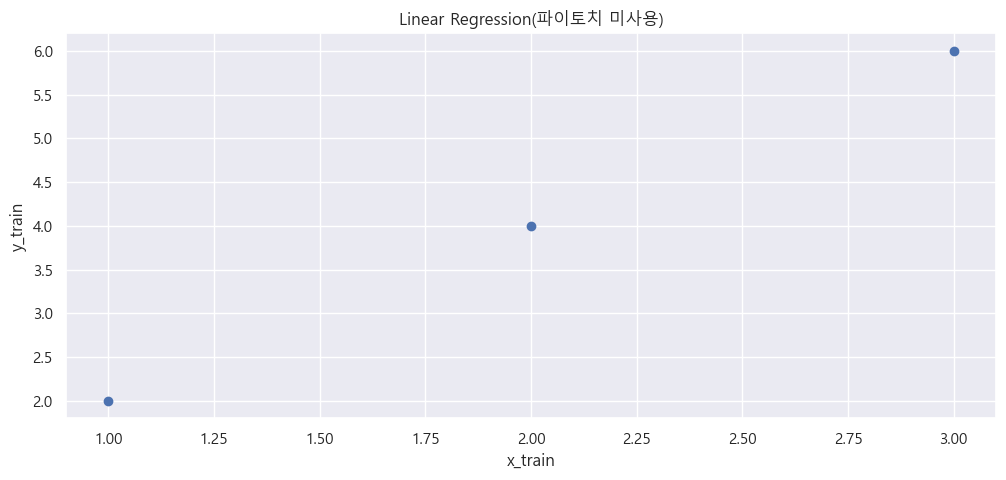

In [19]:
plt.scatter(x_train, y_train)
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.grid(True)
plt.title('Linear Regression(파이토치 미사용)')
plt.show()

In [20]:
## 목적함수
def cal_cost(theta, x, y):
    m = len(y)
    pred = x.dot(theta)
    cost = 1/(2*m)* np.sum(np.square(pred - y))
    return cost

In [21]:
## 경사하강
def gradient_descent(x, y, theta, lr=0.01, n_iter=100):
    m = len(y)
    cost_history = np.zeros(n_iter)
    theta_history = np.zeros((n_iter, 2))
    
    for iter in range(n_iter):
        pred = np.dot(x, theta)
        theta = theta - (1/m)*lr*(x.T.dot(pred - y))
        cost_history[iter] = cal_cost(theta, x, y)
        theta_history[iter, :] = theta.T

    return theta, cost_history, theta_history

In [22]:
theta

array([[-1.64121578],
       [ 1.27079459]])

In [23]:
## 값 구하기
theta, cost_history, theta_history = gradient_descent(x_train_b, y_train, theta, lr, n_iter)

In [24]:
f'bias b: {theta[0,0]}'

'bias b: -0.33015719500920876'

In [25]:
f'weight w : {theta[1, 0]}'

'weight w : 2.1452367167470934'

In [26]:
f'Final cost : {cost_history[-1]}'

'Final cost : 0.007818635094482388'

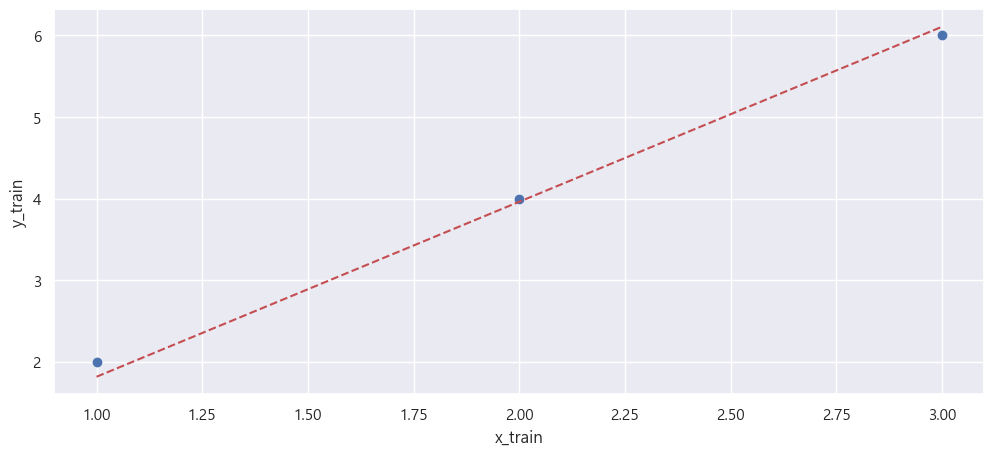

In [27]:
## 차트그리기
plt.scatter(x_train, y_train)
plt.plot(x_train, theta[1, 0]* x_train + theta[0,0], 'r--')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.grid(True)
plt.show()

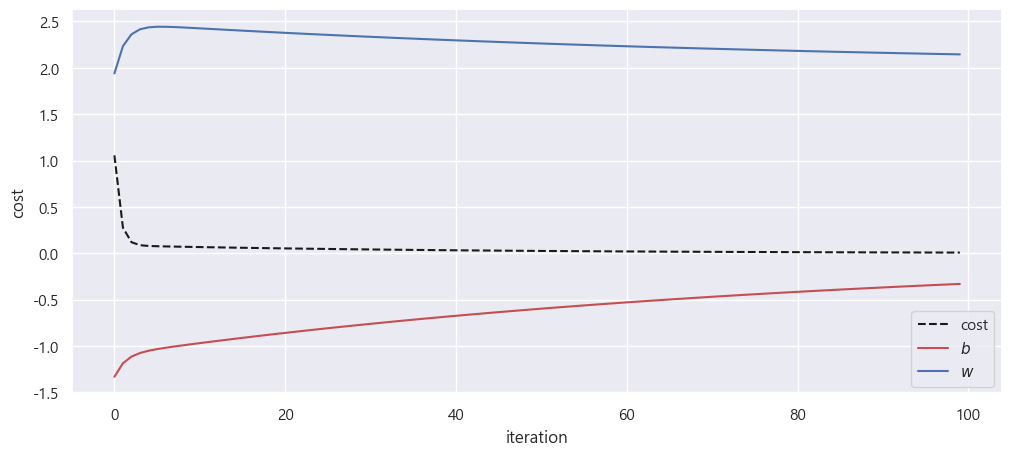

In [28]:
plt.plot(cost_history, 'k--', label='cost')
plt.plot(theta_history[:, 0], 'r-', label='$b$')
plt.plot(theta_history[:, 1], 'b-', label='$w$')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('cost')
plt.grid(True)
plt.show()